In [2]:
import pandas as pd

# Load the data from the provided Excel file
file_path = '/Users/bharatkumar/Downloads/MPVDatasetDownload.xlsx'
data = pd.read_excel(file_path, sheet_name=None)


In [3]:
# Display the sheet names to understand the structure of the file
data.keys()

dict_keys(['2013-2024 Police Killings', '2013-2024 Killings by PD', '2013-2024 Killings by State'])

In [4]:
# Load the data from the "2013-2024 Police Killings" sheet
police_killings_data = data['2013-2024 Police Killings']

# Display the first few rows of the dataframe to understand its structure
police_killings_data.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Officer Prosecuted by (Chief Prosecutor),Prosecutor Race,Prosecutor Gender,Chief Prosecutor Political Party,Chief Prosecutor Term,Officer Prosecuted by (Prosecutor in Court),Special Prosecutor?,Independent Investigation?,Prosecutor Source Link,Killed by Police 2013-24
0,Name withheld by police,Unknown,Male,Unknown race,NaN,2024-05-31,Tryon Road,Saybrook Township,OH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Gino Anthony Marcoccia,49,Male,White,https://bloximages.newyork1.vip.townnews.com/k...,2024-05-30,29380 Speasl Rd,Lebanon,OR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Name withheld by police,Unknown,Male,Unknown race,NaN,2024-05-30,Dixon Rd and McCain Ave,Jackson,MS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Name withheld by police,Unknown,Male,Unknown race,NaN,2024-05-30,3340 Hampton Point Dr,Silver Spring,MD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Daniel Lewis,27,Male,Unknown race,NaN,2024-05-30,Northwest 27th Place,Miami Gardens,FL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


The "2013-2024 Police Killings" sheet contains detailed information about each incident, including victim demographics, incident details, and prosecutorial actions.

To proceed with the analysis, we can focus on several aspects:

1. **Temporal Trends**: Analyzing trends over time.
2. **Demographics**: Distribution by age, gender, and race.
3. **Geographical Distribution**: Analysis by state and city.
4. **Incident Characteristics**: Analysis of incident specifics and outcomes.

## Temporal Trends

First, let's analyze the number of incidents per year to understand the trend over time.


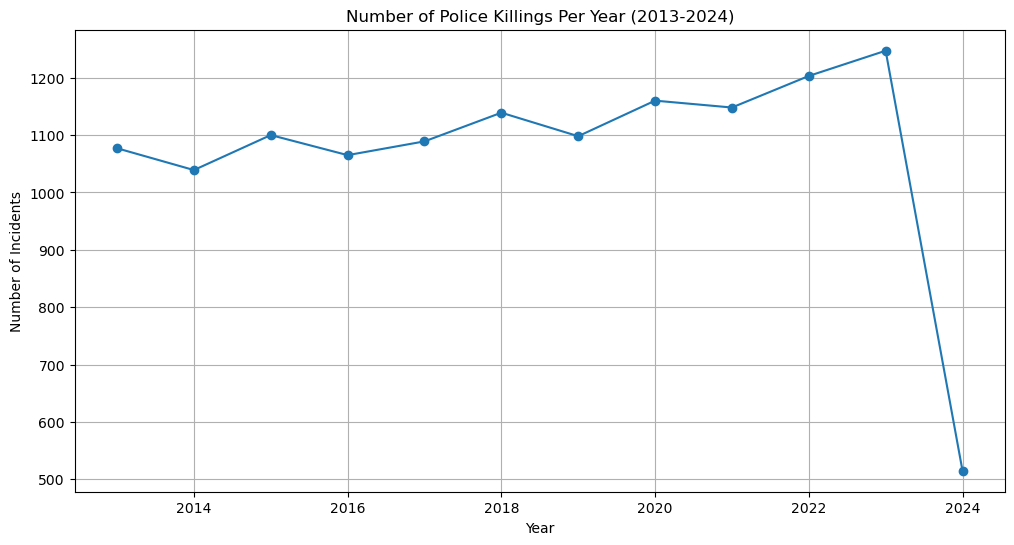

In [5]:
# Convert the "Date of Incident" to datetime format for temporal analysis
police_killings_data['Date of Incident'] = pd.to_datetime(police_killings_data['Date of Incident (month/day/year)'], errors='coerce')

# Extract the year from the date
police_killings_data['Year'] = police_killings_data['Date of Incident'].dt.year

# Count the number of incidents per year
incidents_per_year = police_killings_data.groupby('Year').size()

# Plot the number of incidents per year
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(incidents_per_year.index, incidents_per_year.values, marker='o')
plt.title('Number of Police Killings Per Year (2013-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()


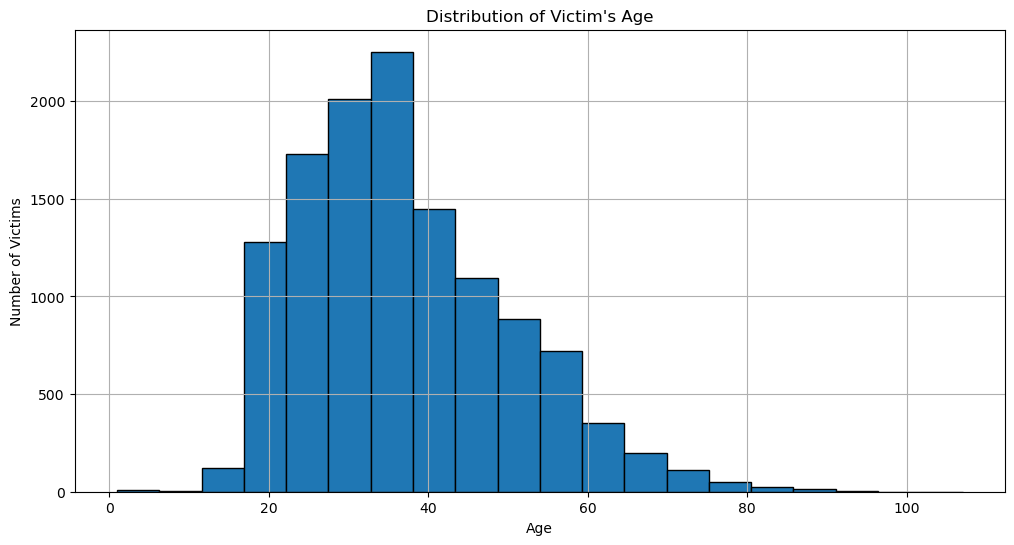

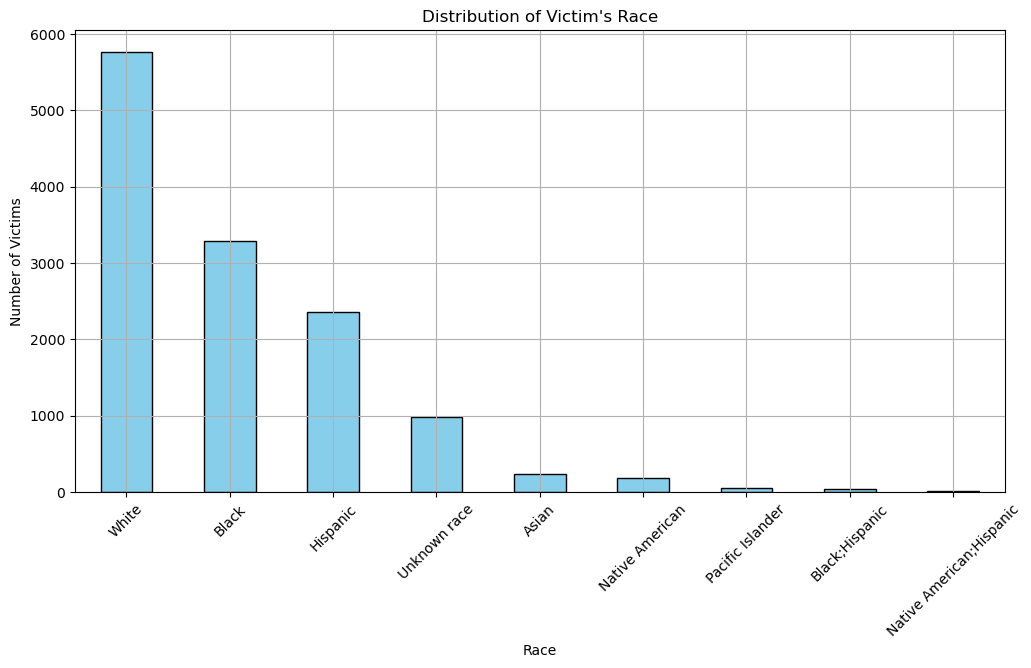

In [9]:
# Clean the age data by removing non-numeric entries and converting to float
import numpy as np

# Replace non-numeric age values with NaN
police_killings_data["Victim's age"] = pd.to_numeric(police_killings_data["Victim's age"], errors='coerce')

# Drop rows with NaN values in the "Victim's age" column
cleaned_age_data = police_killings_data.dropna(subset=["Victim's age"])

# Get the cleaned age distribution
age_distribution_cleaned = cleaned_age_data["Victim's age"]

# Plotting the cleaned age distribution
plt.figure(figsize=(12, 6))
plt.hist(age_distribution_cleaned, bins=20, edgecolor='black')
plt.title("Distribution of Victim's Age")
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.show()

# Plotting the race distribution
plt.figure(figsize=(12, 6))
race_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Victim's Race")
plt.xlabel('Race')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

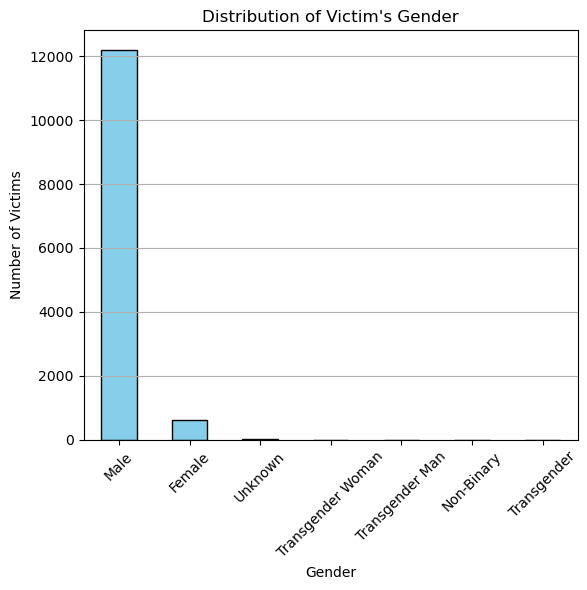

<Figure size 640x480 with 0 Axes>

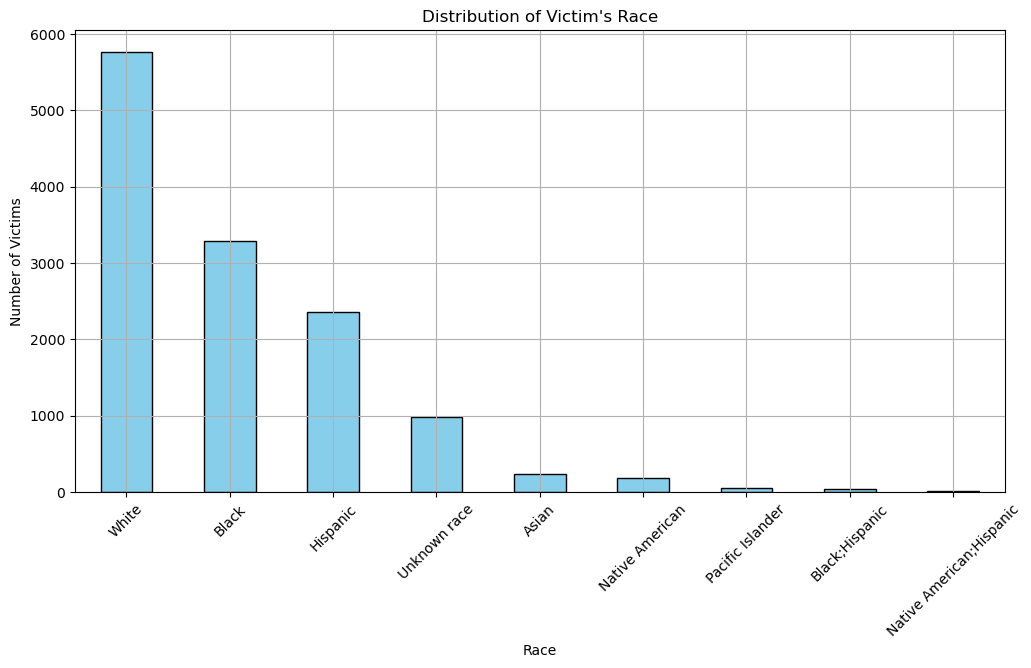

In [15]:
# Recalculate gender and race distribution due to the previous error
gender_distribution = police_killings_data["Victim's gender"].value_counts()
race_distribution = police_killings_data["Victim's race"].value_counts()

plt.figure(figsize=(6, 6))
gender_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Victim's Gender")
plt.xlabel('Gender')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adjust layout to fit within the notebook
plt.tight_layout()
plt.show()

# Adjust layout to fit within the notebook
plt.tight_layout()
plt.show()
# Plotting the race distribution
plt.figure(figsize=(12, 6))
race_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Victim's Race")
plt.xlabel('Race')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

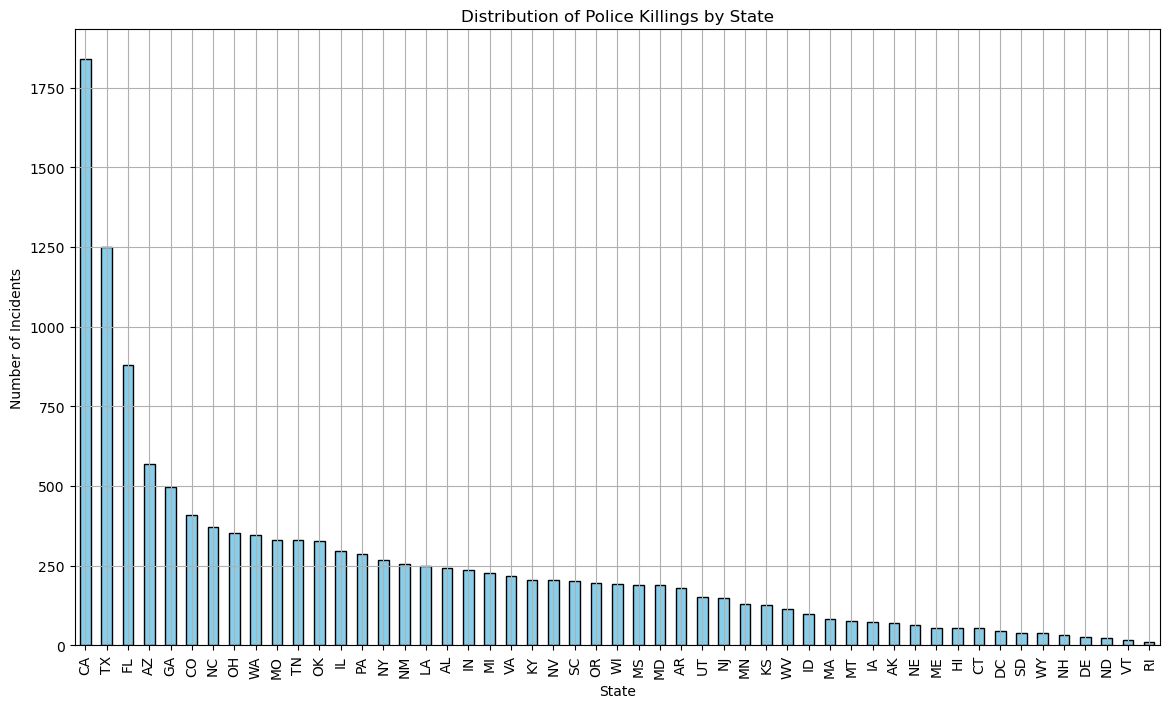

In [10]:
# Geographical distribution analysis

# Distribution by state
state_distribution = police_killings_data['State'].value_counts()

# Plotting the state distribution
plt.figure(figsize=(14, 8))
state_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Police Killings by State")
plt.xlabel('State')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

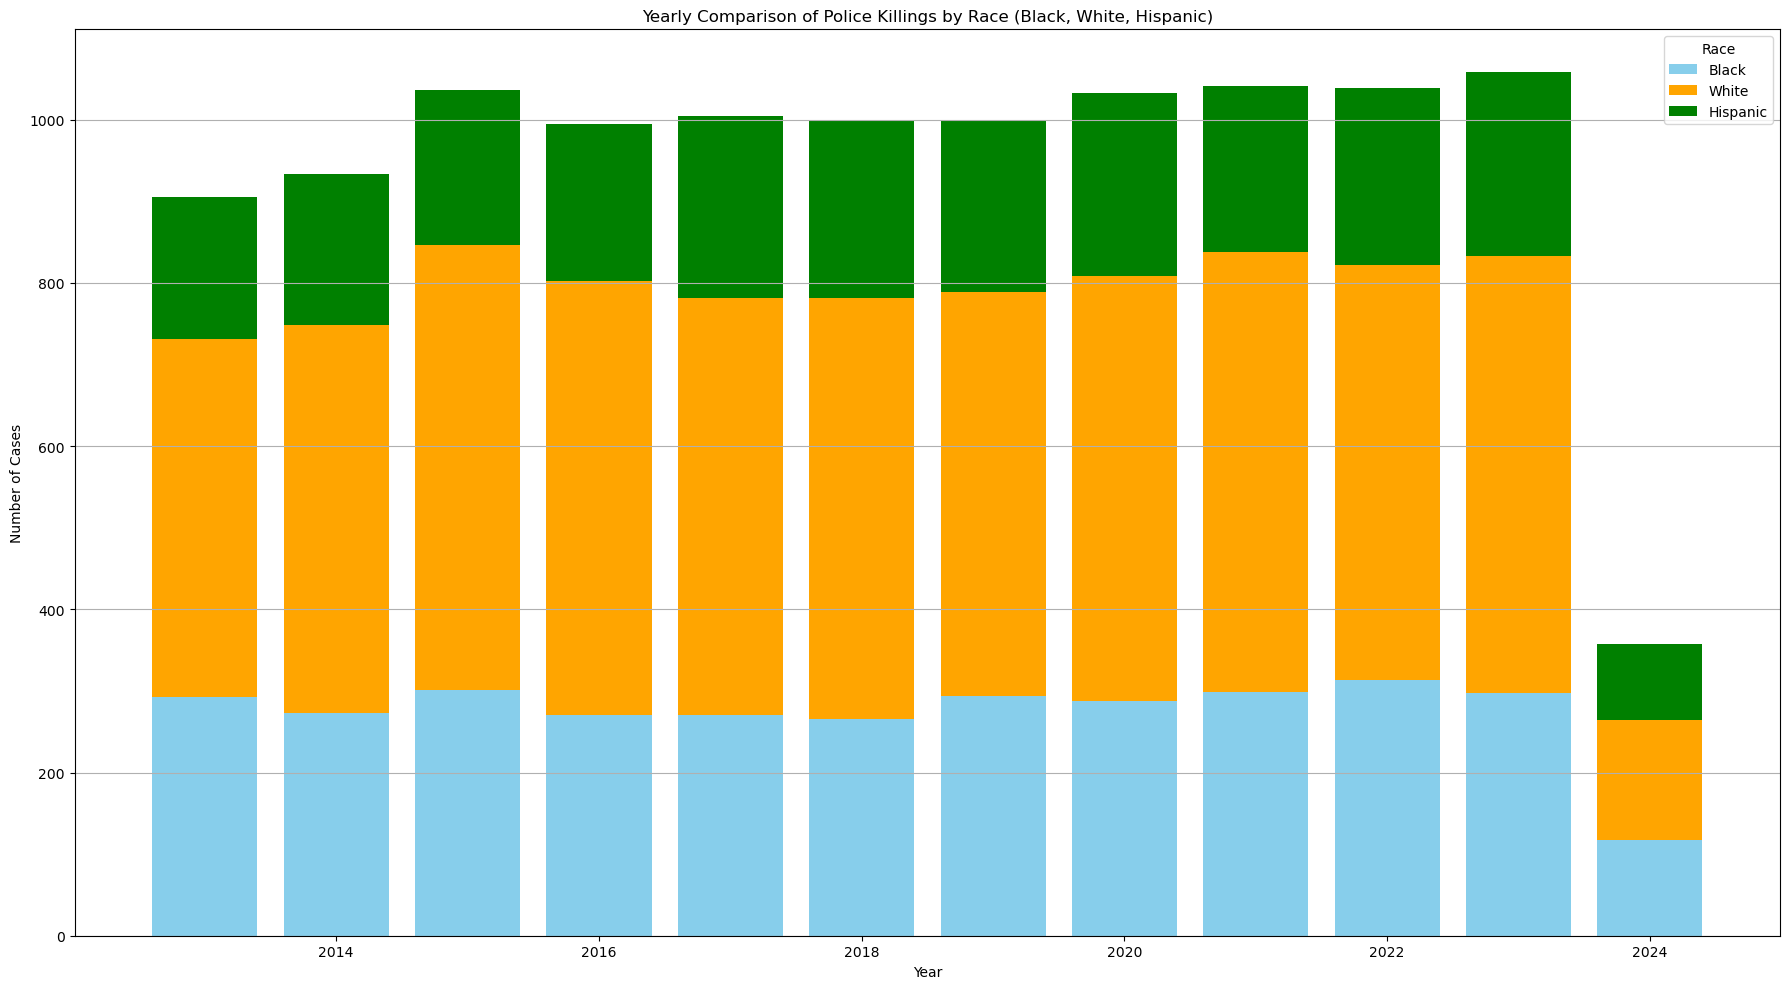

In [20]:
# Group the data by year and race (collapsed to Black, White, Hispanic, Other), then calculate the total cases
yearly_data = police_killings_data.groupby(['Year', 'Collapsed Race']).size().unstack().fillna(0)

# Filter to include only Black, White, and Hispanic
yearly_data_filtered = yearly_data[['Black', 'White', 'Hispanic']]

# Plotting the comparison as stacked bar graphs for each year
fig, ax = plt.subplots(figsize=(18, 10))

colors = {
    'Black': 'skyblue',
    'White': 'orange',
    'Hispanic': 'green'
}

# Plotting the stacked bars for each race
bottom = np.zeros(len(yearly_data_filtered))
for race in ['Black', 'White', 'Hispanic']:
    ax.bar(yearly_data_filtered.index, yearly_data_filtered[race], label=race, color=colors[race], bottom=bottom)
    bottom += yearly_data_filtered[race]

ax.set_title("Yearly Comparison of Police Killings by Race (Black, White, Hispanic)")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Cases")
ax.legend(title='Race')
ax.grid(axis='y')

# Adjust layout to fit within the notebook
plt.tight_layout()
plt.show()

## Population Data (2020 Census estimates)
- **Black**: 41.1 million
- **White**: 204.3 million
- **Hispanic**: 62.1 million

The analysis of police killings from 2013 to 2024, normalized by population data from the 2020 Census, reveals significant racial disparities in the rates of police violence. When adjusted for population sizes, Black and Hispanic individuals experience higher rates of police killings per million people compared to White individuals. The yearly comparison shows that Black individuals, in particular, are disproportionately affected by police violence. Hispanic individuals also face higher rates of police killings than White individuals, but to a lesser extent than Black individuals.


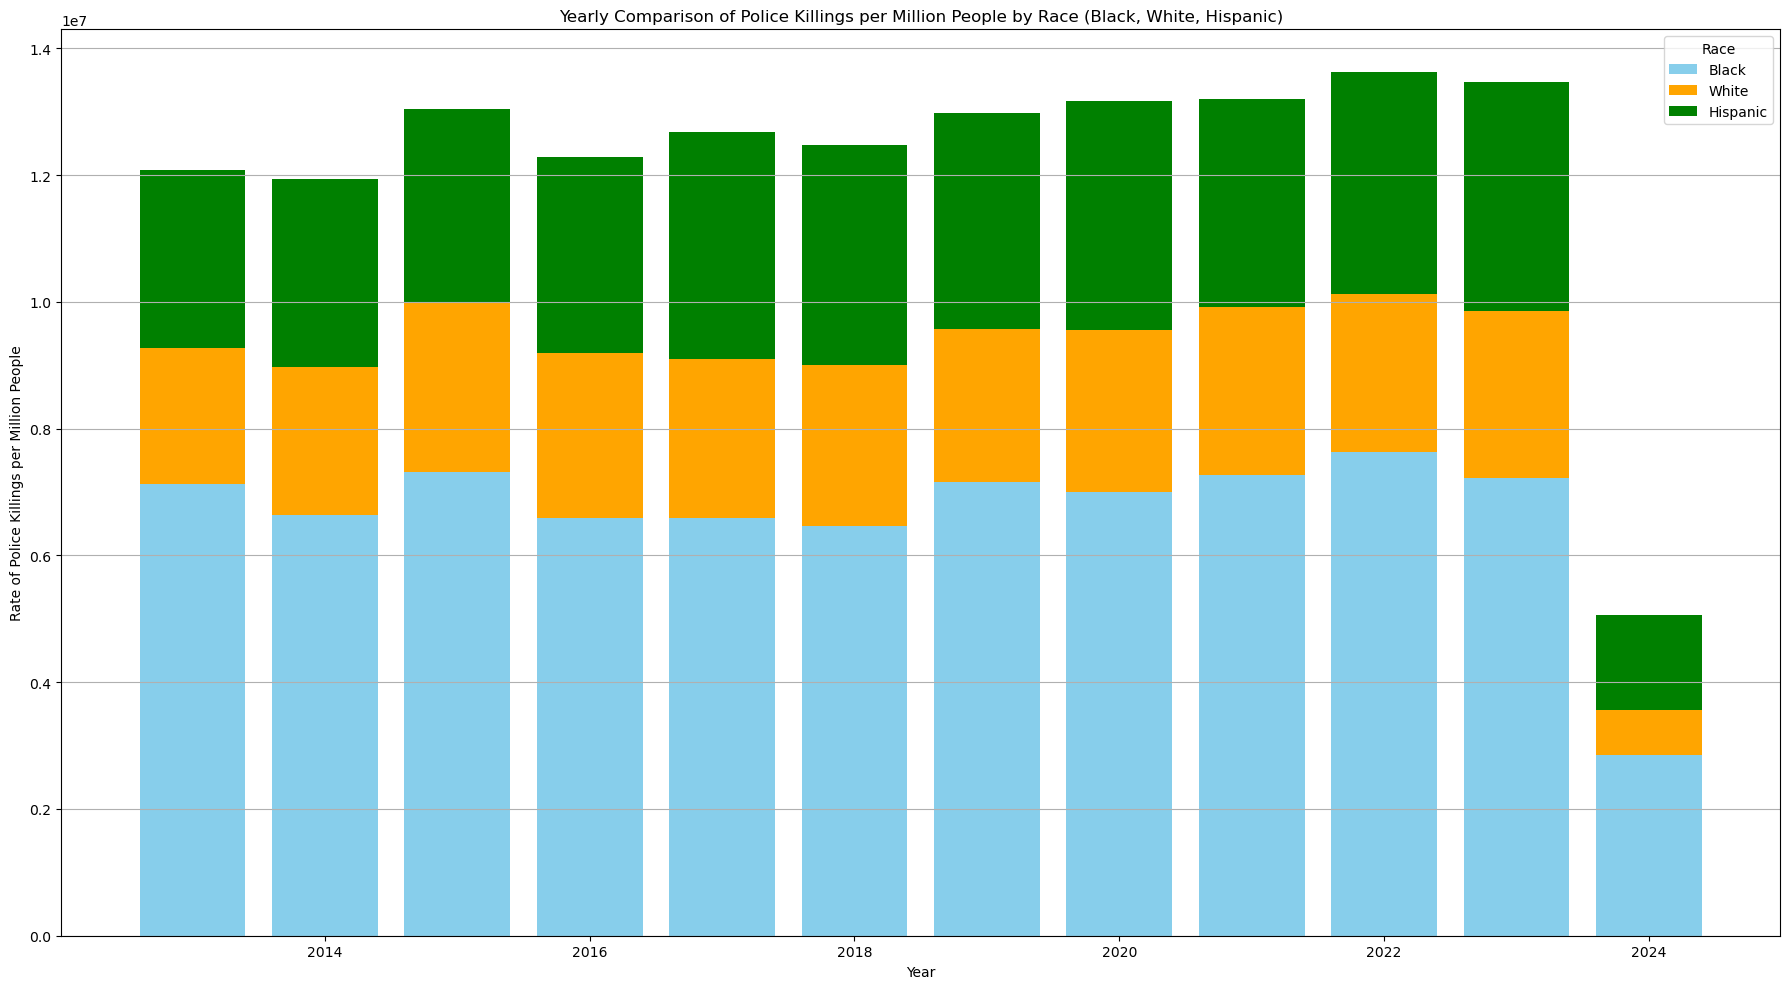

In [21]:
# Population data for each racial group (in millions, based on 2020 Census estimates)
population_data = {
    'Black': 41.1,
    'White': 204.3,
    'Hispanic': 62.1
}

# Calculate the rate of police killings per million people for each racial group
yearly_data_filtered_rate = yearly_data_filtered.copy()

for race in population_data.keys():
    yearly_data_filtered_rate[race] = (yearly_data_filtered[race] / population_data[race]) * 1e6

# Plotting the rates as stacked bar graphs for each year
fig, ax = plt.subplots(figsize=(18, 10))

colors = {
    'Black': 'skyblue',
    'White': 'orange',
    'Hispanic': 'green'
}

# Plotting the stacked bars for each race
bottom = np.zeros(len(yearly_data_filtered_rate))
for race in ['Black', 'White', 'Hispanic']:
    ax.bar(yearly_data_filtered_rate.index, yearly_data_filtered_rate[race], label=race, color=colors[race], bottom=bottom)
    bottom += yearly_data_filtered_rate[race]

ax.set_title("Yearly Comparison of Police Killings per Million People by Race (Black, White, Hispanic)")
ax.set_xlabel("Year")
ax.set_ylabel("Rate of Police Killings per Million People")
ax.legend(title='Race')
ax.grid(axis='y')

# Adjust layout to fit within the notebook
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd

# Load the provided CSV file
file_path = '/Users/bharatkumar/Downloads/Police_Budgets.csv'
police_budgets = pd.read_csv(file_path)

# Display the first few rows to understand its structure
police_budgets.head()

,Alabama,Police Budget,Total Budget,Percent
0,NaN,NaN,NaN,NaN
1,Birmingham,"$100,548,710","$416,405,000",24%
2,Huntsville,"$56,670,720","$244,779,752",23%
3,Mobile,"$63,663,945","$278,410,325",23%
4,Montgomery,"$53,661,679","$269,609,975",20%


In [27]:
# Rename columns
police_budgets.columns = ['City', 'Police Budget', 'Total Budget', 'Percent']

# Drop rows with NaN values that do not contain relevant data
police_budgets.dropna(inplace=True)

# Remove any non-numeric characters and convert budget columns to numerical values
police_budgets['Police Budget'] = police_budgets['Police Budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)
police_budgets['Total Budget'] = police_budgets['Total Budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Convert percentage to numerical values
police_budgets['Percent'] = police_budgets['Percent'].replace({'%': ''}, regex=True).astype(float)

# Display the cleaned dataframe
police_budgets.head()


,City,Police Budget,Total Budget,Percent
1,Birmingham,100548710.0,416405000.0,24.0
2,Huntsville,56670720.0,244779752.0,23.0
3,Mobile,63663945.0,278410325.0,23.0
4,Montgomery,53661679.0,269609975.0,20.0
7,Anchorage,127462000.0,550015000.0,23.0


In [33]:
# Load the original police killings dataset
file_path_killings = '/Users/bharatkumar/Downloads/Police_Budgets.csv'

file_path = '/Users/bharatkumar/Downloads/MPVDatasetDownload.xlsx'
data = pd.read_excel(file_path, sheet_name=None)
# Load the data from the "2013-2024 Police Killings" sheet
police_killings_data = data['2013-2024 Police Killings']

# Display the first few rows of the dataframe to understand its structure
police_killings_data.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Officer Prosecuted by (Chief Prosecutor),Prosecutor Race,Prosecutor Gender,Chief Prosecutor Political Party,Chief Prosecutor Term,Officer Prosecuted by (Prosecutor in Court),Special Prosecutor?,Independent Investigation?,Prosecutor Source Link,Killed by Police 2013-24
0,Name withheld by police,Unknown,Male,Unknown race,NaN,2024-05-31,Tryon Road,Saybrook Township,OH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Gino Anthony Marcoccia,49,Male,White,https://bloximages.newyork1.vip.townnews.com/k...,2024-05-30,29380 Speasl Rd,Lebanon,OR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Name withheld by police,Unknown,Male,Unknown race,NaN,2024-05-30,Dixon Rd and McCain Ave,Jackson,MS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Name withheld by police,Unknown,Male,Unknown race,NaN,2024-05-30,3340 Hampton Point Dr,Silver Spring,MD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Daniel Lewis,27,Male,Unknown race,NaN,2024-05-30,Northwest 27th Place,Miami Gardens,FL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [37]:
# Extract relevant columns from the police killings data
police_killings_relevant = police_killings_data[['City', 'State']].drop_duplicates()

# Merge the cleaned police budget data with the relevant police killings data
merged_data = pd.merge(police_killings_relevant, police_budgets, on='City', how='left')

# Display the merged data
merged_data.head()

# Aggregate police spending data by state
state_budget_data = merged_data.groupby('State').agg({
    'Police Budget': 'sum',
    'Total Budget': 'sum'
}).reset_index()

# Display the aggregated data
state_budget_data.head()


,State,Police Budget,Total Budget
0,AK,1.083275e+09,6.214082e+09
1,AL,6.058648e+08,4.111213e+09
2,AR,1.605841e+09,6.131469e+09
3,AZ,1.713092e+09,5.013569e+09
4,CA,9.024024e+09,3.339601e+10


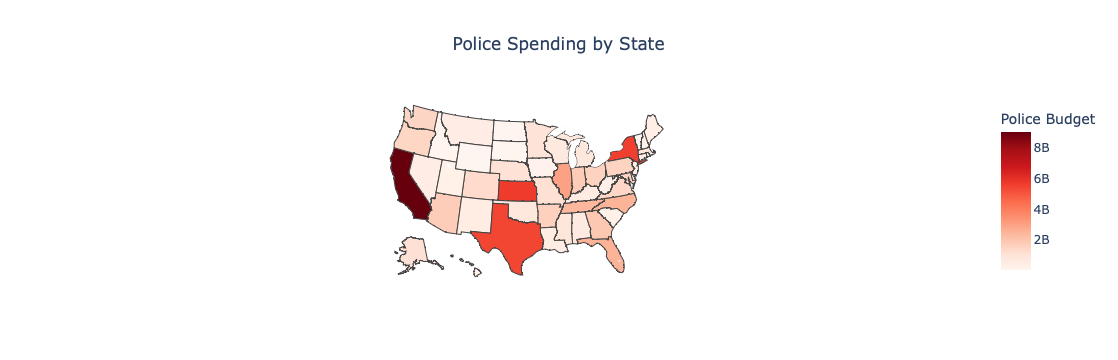

In [40]:
import pandas as pd
import plotly.express as px

# Load the cleaned datasets (assumed to be already loaded as police_killings_data and police_budgets)

# Aggregate police spending data by state
state_budget_data = merged_data.groupby('State').agg({
    'Police Budget': 'sum',
    'Total Budget': 'sum'
}).reset_index()

# Create the choropleth map in reds
fig = px.choropleth(
    state_budget_data,
    locations='State',
    locationmode='USA-states',
    color='Police Budget',
    hover_name='State',
    hover_data=['Police Budget', 'Total Budget'],
    color_continuous_scale='Reds',
    title='Police Spending by State'
)

# Update layout for better visualization
fig.update_layout(
    geo_scope='usa',
    title={
        'text': 'Police Spending by State',
        'x':0.5,
        'xanchor': 'center'
    }
)

# Show the plot
fig.show()



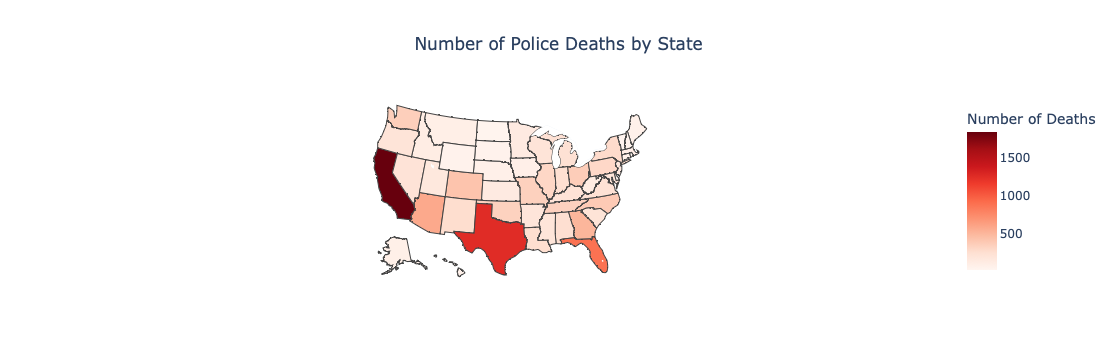

In [41]:
import pandas as pd
import plotly.express as px

# Load the original police killings dataset (assumed to be already loaded as police_killings_data)

# Aggregate the number of police deaths by state
state_deaths_data = police_killings_data.groupby('State').size().reset_index(name='Number of Deaths')

# Create the choropleth map for number of police deaths
fig_deaths = px.choropleth(
    state_deaths_data,
    locations='State',
    locationmode='USA-states',
    color='Number of Deaths',
    hover_name='State',
    hover_data=['Number of Deaths'],
    color_continuous_scale='Reds',
    title='Number of Police Deaths by State'
)

# Update layout for better visualization
fig_deaths.update_layout(
    geo_scope='usa',
    title={
        'text': 'Number of Police Deaths by State',
        'x':0.5,
        'xanchor': 'center'
    }
)

# Show the plot
fig_deaths.show()


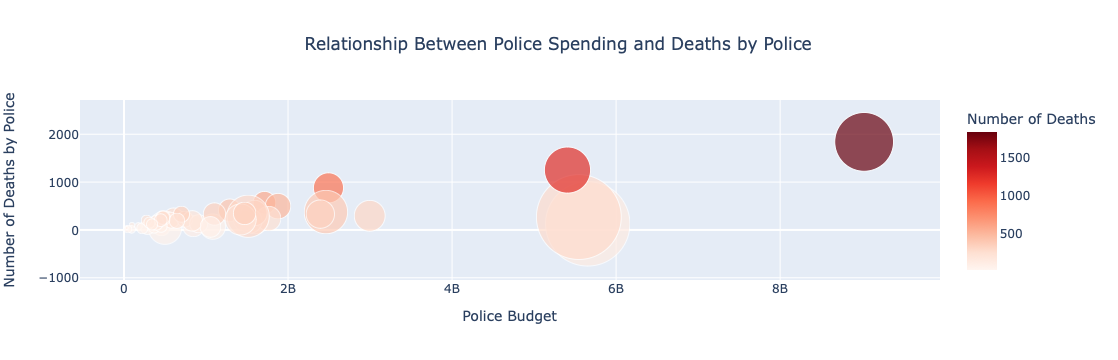

In [43]:
import pandas as pd
import plotly.express as px

# Load the cleaned datasets (assumed to be already loaded as police_killings_data and police_budgets)

# Aggregate police spending data by state
state_budget_data = merged_data.groupby('State').agg({
    'Police Budget': 'sum',
    'Total Budget': 'sum'
}).reset_index()

# Aggregate the number of police deaths by state
state_deaths_data = police_killings_data.groupby('State').size().reset_index(name='Number of Deaths')

# Combine the aggregated police spending and deaths data by state
combined_data = pd.merge(state_budget_data, state_deaths_data, on='State', how='outer')

# Create a scatter plot with police budget and number of deaths
fig_relationship = px.scatter(
    combined_data,
    x='Police Budget',
    y='Number of Deaths',
    size='Total Budget',
    color='Number of Deaths',
    hover_name='State',
    hover_data=['Police Budget', 'Total Budget', 'Number of Deaths'],
    title='Relationship Between Police Spending and Deaths by Police',
    size_max=60,
    color_continuous_scale='Reds'
)

# Update layout for better visualization
fig_relationship.update_layout(
    title={
        'text': 'Relationship Between Police Spending and Deaths by Police',
        'x':0.5,
        'xanchor': 'center'
    },
    xaxis_title='Police Budget',
    yaxis_title='Number of Deaths by Police'
)

# Show the plot
fig_relationship.show()


In [44]:
# Calculate the correlation between police budget and number of deaths by police
correlation = combined_data[['Police Budget', 'Number of Deaths']].corr()

correlation

,Police Budget,Number of Deaths
Police Budget,1.000000,0.780608
Number of Deaths,0.780608,1.000000


The correlation coefficient between police budget and the number of deaths by police is approximately **0.78**.

### Interpretation:
- **Correlation Coefficient (0.78)**: This indicates a strong positive correlation between police budget and the number of deaths by police. In other words, states with higher police budgets tend to have a higher number of deaths by police.


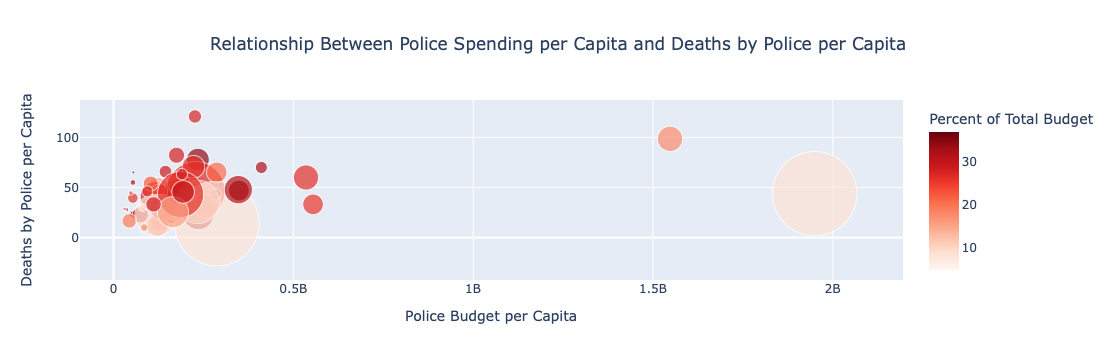

In [45]:
import pandas as pd
import plotly.express as px

# Load the cleaned datasets (assumed to be already loaded as police_killings_data and police_budgets)

# Aggregate police spending data by state
state_budget_data = merged_data.groupby('State').agg({
    'Police Budget': 'sum',
    'Total Budget': 'sum'
}).reset_index()

# Aggregate the number of police deaths by state
state_deaths_data = police_killings_data.groupby('State').size().reset_index(name='Number of Deaths')

# Combine the aggregated police spending and deaths data by state
combined_data = pd.merge(state_budget_data, state_deaths_data, on='State', how='outer')

# Add population data
population_data = {
    'AL': 4.9, 'AK': 0.7, 'AZ': 7.3, 'AR': 3.0, 'CA': 39.5, 'CO': 5.8, 'CT': 3.6, 'DE': 1.0, 'FL': 21.5, 'GA': 10.7,
    'HI': 1.4, 'ID': 1.8, 'IL': 12.7, 'IN': 6.7, 'IA': 3.2, 'KS': 2.9, 'KY': 4.5, 'LA': 4.6, 'ME': 1.3, 'MD': 6.0,
    'MA': 6.9, 'MI': 10.0, 'MN': 5.6, 'MS': 2.9, 'MO': 6.1, 'MT': 1.1, 'NE': 1.9, 'NV': 3.1, 'NH': 1.4, 'NJ': 8.9,
    'NM': 2.1, 'NY': 19.3, 'NC': 10.5, 'ND': 0.8, 'OH': 11.7, 'OK': 4.0, 'OR': 4.2, 'PA': 12.8, 'RI': 1.1, 'SC': 5.1,
    'SD': 0.9, 'TN': 6.9, 'TX': 29.0, 'UT': 3.3, 'VT': 0.6, 'VA': 8.6, 'WA': 7.6, 'WV': 1.8, 'WI': 5.8, 'WY': 0.6
}
combined_data['Population (millions)'] = combined_data['State'].map(population_data)

# Normalize data
combined_data['Police Budget per Capita'] = combined_data['Police Budget'] / combined_data['Population (millions)']
combined_data['Deaths per Capita'] = combined_data['Number of Deaths'] / combined_data['Population (millions)']
combined_data['Percent of Total Budget'] = (combined_data['Police Budget'] / combined_data['Total Budget']) * 100

# Create a scatter plot with normalized values
fig_normalized = px.scatter(
    combined_data,
    x='Police Budget per Capita',
    y='Deaths per Capita',
    size='Total Budget',
    color='Percent of Total Budget',
    hover_name='State',
    hover_data=['Police Budget', 'Total Budget', 'Number of Deaths', 'Population (millions)', 'Percent of Total Budget'],
    title='Relationship Between Police Spending per Capita and Deaths by Police per Capita',
    size_max=60,
    color_continuous_scale='Reds'
)

# Update layout for better visualization
fig_normalized.update_layout(
    title={
        'text': 'Relationship Between Police Spending per Capita and Deaths by Police per Capita',
        'x':0.5,
        'xanchor': 'center'
    },
    xaxis_title='Police Budget per Capita',
    yaxis_title='Deaths by Police per Capita'
)

# Show the plot
fig_normalized.show()


## Findings

### Correlation Analysis

The correlation coefficient between the normalized police budget per capita and deaths by police per capita is approximately **0.29**.

### Interpretation:
- **Correlation Coefficient (0.29)**: This indicates a weak positive correlation between police budget per capita and deaths by police per capita. In other words, states with higher police budgets per capita tend to have a slightly higher number of deaths by police per capita, but the relationship is not very strong.

This suggests that while there is some positive association between the amount of money spent per person on police and the number of deaths per person by police, other factors may also play significant roles in influencing these outcomes.


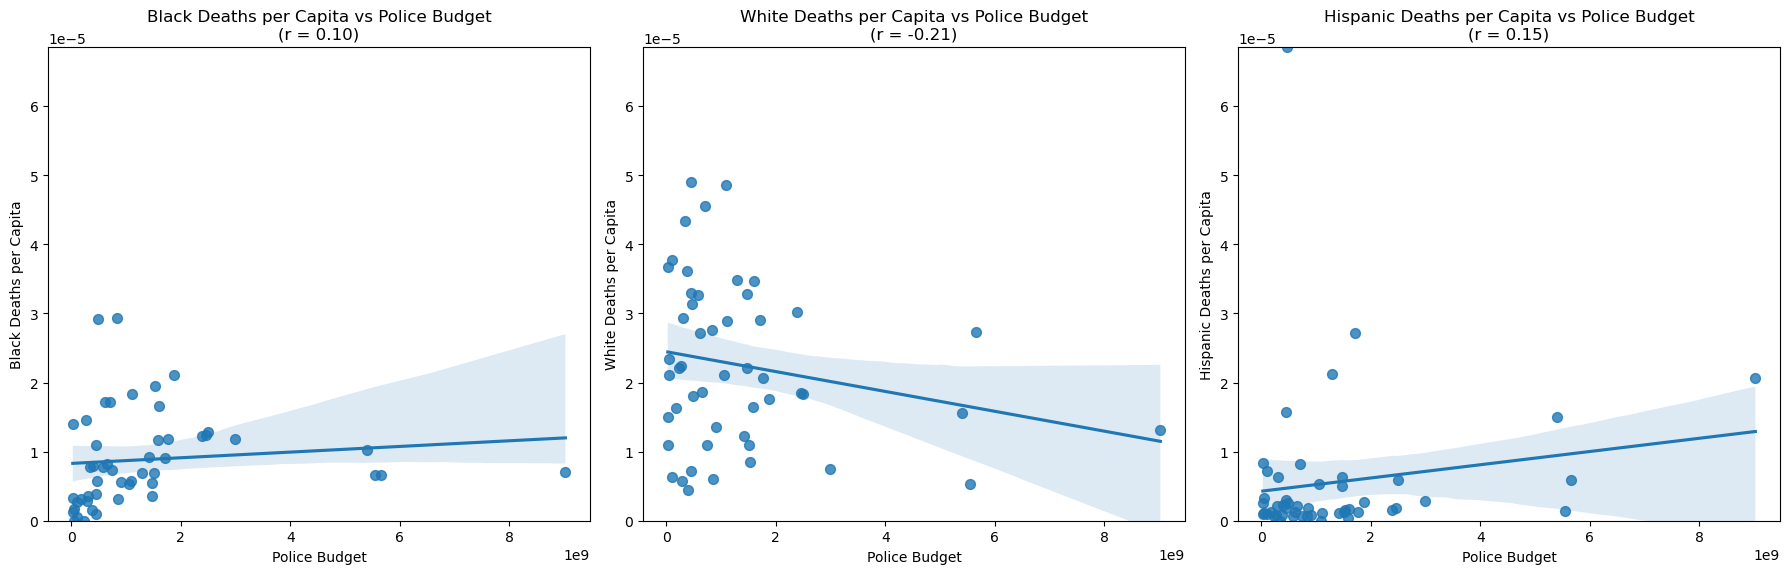

In [53]:
# Create scatter plots for each racial group with the same y-axis limits and a line of best fit
plt.figure(figsize=(18, 6))

# Determine the y-axis limits based on the combined data
y_min = min(combined_race_data[['Black Deaths per Capita', 'White Deaths per Capita', 'Hispanic Deaths per Capita']].min())
y_max = max(combined_race_data[['Black Deaths per Capita', 'White Deaths per Capita', 'Hispanic Deaths per Capita']].max())

# Scatter plot for Black Deaths per Capita with line of best fit
plt.subplot(1, 3, 1)
sns.regplot(x='Police Budget', y='Black Deaths per Capita', data=combined_race_data, scatter_kws={'s': 50})
plt.title(f'Black Deaths per Capita vs Police Budget\n(r = {correlations["Black"]:.2f})')
plt.xlabel('Police Budget')
plt.ylabel('Black Deaths per Capita')
plt.ylim(y_min, y_max)

# Scatter plot for White Deaths per Capita with line of best fit
plt.subplot(1, 3, 2)
sns.regplot(x='Police Budget', y='White Deaths per Capita', data=combined_race_data, scatter_kws={'s': 50})
plt.title(f'White Deaths per Capita vs Police Budget\n(r = {correlations["White"]:.2f})')
plt.xlabel('Police Budget')
plt.ylabel('White Deaths per Capita')
plt.ylim(y_min, y_max)

# Scatter plot for Hispanic Deaths per Capita with line of best fit
plt.subplot(1, 3, 3)
sns.regplot(x='Police Budget', y='Hispanic Deaths per Capita', data=combined_race_data, scatter_kws={'s': 50})
plt.title(f'Hispanic Deaths per Capita vs Police Budget\n(r = {correlations["Hispanic"]:.2f})')
plt.xlabel('Police Budget')
plt.ylabel('Hispanic Deaths per Capita')
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()

